In [41]:
import geopandas as gpd
import matplotlib.pyplot as plt

import numpy as np

import contextily as ctx

In [6]:
communities = gpd.read_file('https://cn.dataone.org/cn/v2/resolve/urn%3Auuid%3Aed7718ae-fb0d-43dd-9270-fbfe80bfc7a4')
communities.head()

,name,population,country,geoname-id,geometry
0,Udomlya,32373,RU,452949,POINT (34.99250 57.87944)
1,Valmiera,26963,LV,453754,POINT (25.42751 57.54108)
2,Ventspils,42644,LV,454310,POINT (21.57288 57.38988)
3,Vec-Liepāja,85260,LV,454432,POINT (21.01667 56.53333)
4,Tukums,18348,LV,454768,POINT (23.15528 56.96694)


In [7]:
us_comms = communities[communities.country == "US"]

<AxesSubplot:ylabel='Frequency'>

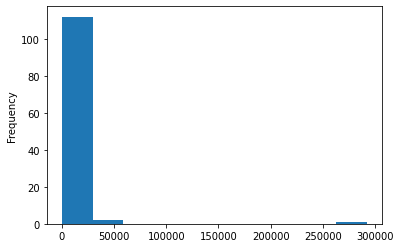

In [13]:
us_comms.population.plot(kind='hist')

In [15]:
us_comms.population.max()

291826

In [45]:
us_comms['log_pop'] = np.log(us_comms.population)

/opt/anaconda3/envs/gee_env/lib/python3.9/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [53]:
us_comms['log_pop']

1257    10.350574
1258     6.322565
1259     8.993427
1260     6.626718
1261     7.247793
          ...    
1394     6.751101
1395     6.998510
1396     7.277248
1397     7.138867
1423     8.798002
Name: log_pop, Length: 115, dtype: float64

In [28]:
#gpd.datasets.available()

TypeError: 'list' object is not callable

TypeError: __init__() got an unexpected keyword argument 'loc'

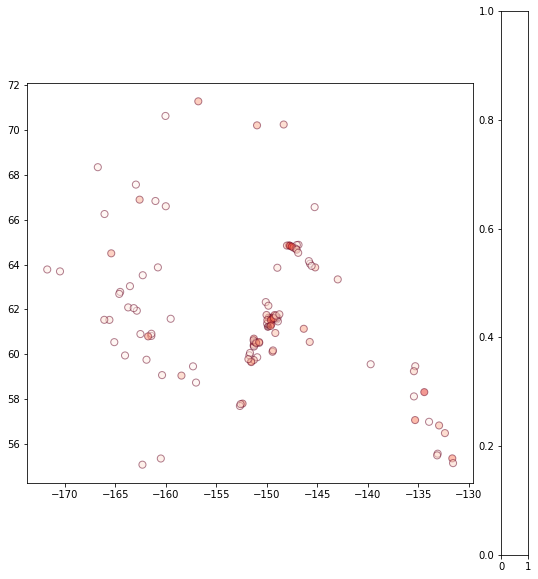

In [64]:
fig, ax = plt.subplots( figsize=(10, 10))

us_comms.plot(ax=ax, 
             #markersize='log_pop'
             markersize = 50,
             alpha=0.5,
             column=np.log(us_comms.population),
             edgecolor="xkcd:maroon",
             cmap='Reds',
             legend=True
            )
# cx.add_basemap(ax=ax, 
#                attribution=False,
#                crs=us_comms.crs.to_string())
#                #source=cx.providers.Stamen.TonerLite)
plt.show()

In [32]:
nat_earth = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
nat_earth

/var/folders/2t/z8yp2j2x6xx2yx79s5y4w7gr0000gn/T/ipykernel_1686/3081358086.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  nat_earth = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [34]:
canada = nat_earth[nat_earth.name=='Canada']

<AxesSubplot:>

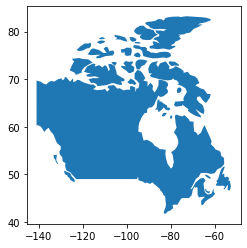

In [36]:
canada.plot()